

# Project: Medical Appointments Attendances Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> In this project, I will use <a href="https://www.kaggle.com/joniarroba/noshowappointments" title="Medical Appointment No Show">Medical Appointment No Shows</a> provided by Kaggle as my analysis dataset. My project goal is to find out the factors for us to predict if a patients will show up for their scheduled appointment.

In [1]:
# Import statement to load usefull packages.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import datetime

%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

>In this section of the report, data will be:
- loaded
- accessed for cleanliness check
- trimed and cleaned for analysis 


### 2.1 Gathering data

>The dataset is taken from <a href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000">here</a>.


### 2.2 Accessing data

> Steps taken:

> - Load and read data from `noshowappointments.csv` for inspection. 

> - The shape, datatype, first few and last few records and summary of statistic of the dataset are displayed for me to get a quick understanding about the dataset.

> - Then, checking will be done to see if there is missing values and also duplicate records in the dataset.


First, load and read data from `noshowappointments.csv` for inspection. And have a look at few and last few records of the dataset. 

In [2]:
#Loading and inspecting the dataset. 
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


Here, we take a look at the shape and datatype of the dataframe.

In [4]:
# this returns a tuple of the dimensions of the dataframe
print("This dataset contains {} rows and {} columns ".format(df.shape[0],df.shape[1]))

This dataset contains 110527 rows and 14 columns 


In [5]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Below are the summary of statistic of the dataset.

In [6]:
# this returns summary statistic of dataset.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Next step, we will check if there is any missing values.

In [7]:
# Number of missing values in the dataset
print("Columns with missing value? {}.".format(df.isna().values.any()))
pd.isnull(df).sum()

Columns with missing value? False.


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# Number of duplicated values in the dataset
print("Number of duplicated record? {}.".format(sum(df.duplicated())))

Number of duplicated record? 0.


Here, unique values of some columns are observed.

In [9]:
# Return unique value of columns
print('Find distinct unique values of each column')
print('------------------------------------------')
print('Age:',sorted(df.Age.unique()))
print("The column `Age` contains values from {} to {}.".
      format(df['Age'].min(), df['Age'].max()), '\n')

print('Gender:',df.Gender.unique())
print("Neighbourhood",df.Neighbourhood.unique())
print("The column `Neighbourhood` contains {} unique values.".
      format(df['Neighbourhood'].nunique()),'\n')

print('Scholarship:',df.Scholarship.unique(),'\n')
print('Hipertension:',df.Hipertension.unique(),'\n')
print('Diabetes:',df.Diabetes.unique(),'\n')
print('Alcoholism:',df.Alcoholism.unique(),'\n')
print('Handcap:',df.Handcap.unique(),'\n')
print('SMS_received:',df.SMS_received.unique(),'\n')
#print('No-show: ',df.No-show.unique(),'\n')

Find distinct unique values of each column
------------------------------------------
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
The column `Age` contains values from -1 to 115. 

Gender: ['F' 'M']
Neighbourhood ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUA

Let us also at look  `AppointmentDay` to see what datatype is it, and Min and Max of ` AppointmentDay`.

In [10]:
# Appointment min and max date.

min(df['AppointmentDay']) 

'2016-04-29T00:00:00Z'

In [11]:
max(df['AppointmentDay'])

'2016-06-08T00:00:00Z'



###  2.3 Cleaning data

>Steps taken :
- Convert datatypes (convert dates from object to datetime)
- Create new column
- Drop unnecessary columns and rows
- Rename column labels to snake case or more meaningful name
- Spelling correction
- Replace data value

The columns `ScheduleDay` and `AppointmentDay` will be splitted into 
into date and time columns using `numpy datetime64 function`.
The date and time may be needed for analysis later.

In [12]:
# Convert datatype of AppointmentDay to Datetime
# Split it into AppointmentDayDate and AppointmentDayTime
df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['ScheduledDayDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['AppointmentDayDate'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['AppointmentDayTime'] = pd.to_datetime(df['AppointmentDay']).dt.time

Create a new column to store waiting days from the `ScheduledDay` to `AppointmentDate`.

In [13]:

df['NumberOfWaitingDays'] = (df['AppointmentDayDate'] - df['ScheduledDayDate']).dt.days


Drop rows if

- Patient `age` is -1, this is invalid age.
- Patient `age` bigger than 100, not many people will outlive 100 years.

- `NumberOfWaitingDays` <= -1, something may have wrong because there are 6 records where appointment day past the scheduled day.

In [14]:
# Drop rows 
df.drop(df[df['Age'] == -1].index, inplace=True)
df.drop(df[df['Age'] > 100].index, inplace=True)


In [15]:
df.drop(df[df['NumberOfWaitingDays'] <= -1].index, inplace=True)

Rename the column name to snake case. Column `no-show` will be renamed to `show_up` and `neighbourhood` to `hospital-location` for better representation.

In [16]:

# Renaming columns

def camelcase_to_snakecase(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df.columns = df.columns.map(camelcase_to_snakecase)



In [17]:
# Rename columns with more meaningful names
df.rename(columns={'no-show':'show_up'}, inplace=True)
df.rename(columns={'neighbourhood':'hospital-location'}, inplace=True)

Rename the columns to correct the spelling error.

In [18]:
df.rename(columns={'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)

Replace the value in `show_up`,  `No-> 1` and `Yes->0`

In [19]:
# Replace new col 'show_up' values No->1(Yes) and Yes->0(No)
df['show_up'].replace(['No', 'Yes'], [1, 0], inplace=True)

Save csv to new file. I need to verify cleaned data from csv.

In [20]:
df.to_csv('noshowappointments_v1.csv', index=False)

Load cleaned data for exploration and analysis.

In [21]:
# Loading and inspecting the dataset that created above. 
df_1 = pd.read_csv('noshowappointments_v1.csv')


<a id='eda'></a>
## 3. Exploratory Data Analysis
 

### Question 1 :  How scholarship relates to the target variable ? 

`Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
I will find out if there if patient that enrolled in this welfare program is more likely to show up or not.

A histogram to shows distribution of number of patients who has scholarship and without and their show up result.

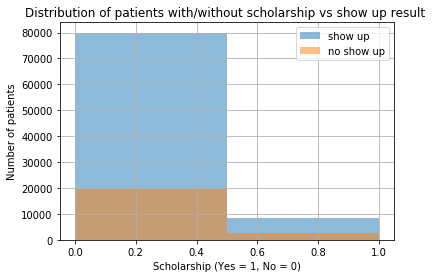

In [22]:
target_var = 'show_up'

show_yes= df_1.show_up == 1
show_no = df_1.show_up == 0

df_1.scholarship[show_yes].hist(alpha =0.5, bins=2, label='show up')
df_1.scholarship[show_no].hist(alpha =0.5, bins=2, label='no show up')
 
plt.title('Distribution of patients with/without scholarship vs show up result ')
plt.ylabel('Number of patients')
plt.xlabel('Scholarship (Yes = 1, No = 0)')
plt.legend();
plt.show();

From histogram, we can see that the number of those who have scholarship have a more `show up` then `no show up`. No much insight I get from this information, I will do a calculation to look at the percentage.

In [23]:
print('---------------------------------------------------------------')
print( "Scholarship  relate to show_up status (1=Yes, 0=No) by percentage (%).", '\n')

print((df_1.groupby(['scholarship',target_var])['patient_id'].count()/df_1.shape[0])*100, '\n')

---------------------------------------------------------------
Scholarship  relate to show_up status (1=Yes, 0=No) by percentage (%). 

scholarship  show_up
0            0          17.855656
             1          72.316630
1            0           2.332736
             1           7.494978
Name: patient_id, dtype: float64 



`9.8%` of the total patients enrolled the scholarship and out of it, 7.5% show up and 2.3% did not show up.
From the data, those who receive scholarship is more likely to show up, but I do not see a strong relationship between `scholarship` with `show-up` result.

### Question 2 :  How does sms reminder relate to show up status for appointment ? 
> - Overall, how many percent of those who receive SMS did not show up ?
> - Overall, how many percent of those who didn't not receive sms show up ?

Data is selected group by sms_received and show_up, the row count and percentage are calculated as below : 

In [24]:
# Calculate show up pecentage of patients who receive SMS or not.
sms_received = df_1.query('sms_received == 1')
no_sms_received = df_1.query('sms_received == 0')
sms_received_show_up_count = sms_received.groupby('show_up')['patient_id'].count()
no_sms_received_show_up_count = no_sms_received.groupby('show_up')['patient_id'].count()
sms_received_show_up_proportion = sms_received_show_up_count/sms_received_show_up_count.sum()
no_sms_received_show_up_proportion = no_sms_received_show_up_count/no_sms_received_show_up_count.sum()

print('---------------------------------------------------------------')
print( "sms_received relate to show_up status (1=Yes, 0=No) by number of patients. ", '\n')

print((df_1.groupby(['sms_received', target_var])['patient_id'].count()), '\n')

print('---------------------------------------------------------------')

print( "sms_received  relate to show_up status (1=Yes, 0=No) by percentage (%).", '\n')

print((df_1.groupby(['sms_received',target_var])['patient_id'].count()/df_1.shape[0])*100, '\n')

---------------------------------------------------------------
sms_received relate to show_up status (1=Yes, 0=No) by number of patients.  

sms_received  show_up
0             0          12527
              1          62506
1             0           9784
              1          25697
Name: patient_id, dtype: int64 

---------------------------------------------------------------
sms_received  relate to show_up status (1=Yes, 0=No) by percentage (%). 

sms_received  show_up
0             0          11.335215
              1          56.559350
1             0           8.853177
              1          23.252258
Name: patient_id, dtype: float64 



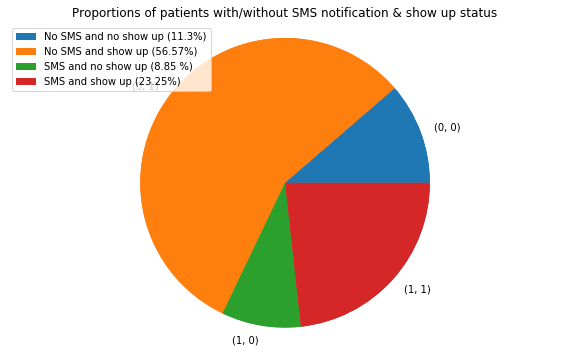

In [25]:
sms_received_show_up_percentage=(df_1.groupby(['sms_received',target_var])['patient_id'].count()/df_1.shape[0])*100
sms_received_show_up_percentage.name = ''
sms_received_show_up_percentage.plot(kind='pie', figsize=(8, 5))

labels = [r'No SMS and no show up (11.3%)', r'No SMS and show up (56.57%)', 
r'SMS and no show up (8.85 %)', r'SMS and show up (23.25%)']
sizes = [11.339, 56.557, 8.8528, 23.251]
patches, texts = plt.pie(sizes)
plt.title('Proportions of patients with/without SMS notification & show up status')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

From the above pie chart above, contrary to the usual belief, it appears that sending of SMS to the patient for 
their appointments isn’t making a big difference. 

### Question 3 : Which locations of hospital are having most appointment that did not show up  ?


>Location that is hard to be accessed may affect the patients to show up in appointment. There is no information about whether the location is in city/outskirt area or what kind of transportation available to access to the hospital location. 

>1) Find out what are the top 10 location that have the most patients who are not showing up.

>2) What are the numbers of female or male from top 10 location that are not showing up ? 

#### Find out what are the top 10 locations that have the most patients who are not showing up.



In [26]:
# calculate top 5 hospital locations that did not show up in appointment.
df_show_no = df_1.query('show_up == 0' ) 
df_location_top_no_show=df_show_no.groupby('hospital-location')['patient_id'].count().sort_values(ascending=False).head(5)
 

In [27]:
print('Top 5 locations and the number of patients')
print('-------------------------------------------')
print(df_location_top_no_show)

Top 5 locations and the number of patients
-------------------------------------------
hospital-location
JARDIM CAMBURI    1465
MARIA ORTIZ       1219
ITARARÉ            923
RESISTÊNCIA        905
CENTRO             703
Name: patient_id, dtype: int64


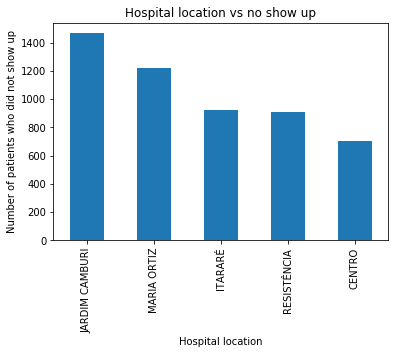

In [28]:
 
df_location_top_no_show.plot(kind='bar');
plt.title('Hospital location vs no show up')
plt.ylabel('Number of patients who did not show up')
plt.xlabel('Hospital location')
plt.show();

After plotting `show up = No` and grouped by `hospital-location` we can see that Hospital located at JARDIM CAMBURI has the highest number of patients not showing up, which is 1465 people.Followed by MARIA ORTIZ - 1219 people and ITARARÉ - 923. 

 ####  What are the numbers of female or male from top 10 locations that no show ?
 
 > - Female or male has the higher tendency not to show up ?

In [29]:
# calculate top 10 hospital locations by gender that did not show up in appointment.

df_location_top_no_show_gender=df_show_no.groupby(['hospital-location', 'gender'])['patient_id'].count().sort_values(ascending=False).head(10)

In [30]:

print('Top 10 locations and the number of patients by gender')
print('------------------------------------------------------')
print(df_location_top_no_show_gender)

Top 10 locations and the number of patients by gender
------------------------------------------------------
hospital-location  gender
JARDIM CAMBURI     F         997
MARIA ORTIZ        F         794
ITARARÉ            F         604
RESISTÊNCIA        F         570
JARDIM CAMBURI     M         468
JESUS DE NAZARETH  F         442
MARIA ORTIZ        M         425
JARDIM DA PENHA    F         414
CENTRO             F         398
CARATOÍRA          F         381
Name: patient_id, dtype: int64


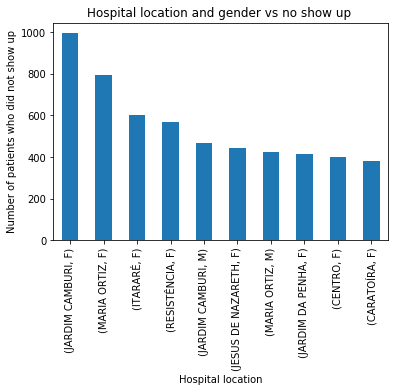

In [31]:

df_location_top_no_show_gender.plot(kind='bar');
plt.title('Hospital location and gender vs no show up ')
plt.ylabel('Number of patients who did not show up')
plt.xlabel('Hospital location')
plt.show();


After plotting `show up = No` and grouped by `hospital-location and gender`, we can see that female patients from hospital at `JARDIM CAMBURI` also give the highest count among the no show up result.

###  Question 4 : Will those below 10 years old and above 80 years old give a higher  no show up result ?

> Those who are younger than 12 and above 80 years old are dependant on others to transport them to hospital. Chances for them to miss the appoinment is higher if they cannot find help.

>1)  I will shows the distribution of show up result by number of waiting days using a graph.

>2) Use 10 `age_group_range` to calcute the percentage of show up status.
> - Child : 0 - 10
> - Teen : 11-20
> - Young adult : 21-30
> -  Adult 1 : 31-40
> -  Adult 2 : 41-50
> -  Adult 3 : 51-60
> -  Senior adult : 61-70
> -  Old : 71-80
> -  Old 2 : 81-90
> - Old 3 : 91-100

Graph below shows the distribution of show up result by `number of waiting days`.

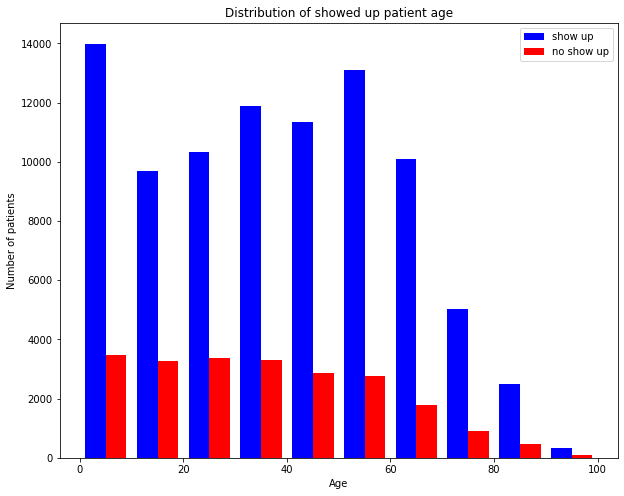

In [32]:

# Plot the distribution of distribution of show up result by `age`.

plt.figure(figsize=(10,8))
plt.hist([df_1[df_1['show_up']==1]['age'], df_1[df_1['show_up']==0]['age']], stacked=False, color = ['b','r'],label = ['show up','no show up'])
plt.legend()
plt.title('Distribution of showed up patient age')
plt.ylabel('Number of patients')
plt.xlabel('Age')
plt.show();


Next, I will try to calculate the count and percentage.  I am using 10 different age group as variable to calcute the percentage of show up status.
 

In [33]:
# list number of waiting days to be explored.
age_group_range= [0,11,21,31,41,51,61,71,81,91]
print('-------------------------------------------------------------------', '\n')


for i in age_group_range :
    print('Age_group_range from {} to {} years old.'.format(i, i+10))
    print('---------------------------')
    
    total = df_1.query('age > @i & age < @i+10')
    print('Total row count : {}'.format(total['show_up'].count()), '\n')
    
    showedup = df_1.query('(age > @i & age < @i+10) & show_up == 1')
    print('Show up = Yes')
    print('{} rows '.format(showedup['show_up'].count()))
    print('{} % '.format(showedup['show_up'].count()/total['show_up'].count()*100), '\n')
 
    noshowedup = df_1.query('(age > @i & age < @i+10) & show_up == 0 ')
    print('Show up = No')
    print('{} rows '.format(noshowedup['show_up'].count()))
    print('{} % '.format(noshowedup['show_up'].count()/total['show_up'].count()*100), '\n')
    
    print('-------------------------------------------------------------------', '\n')


------------------------------------------------------------------- 

Age_group_range from 0 to 10 years old.
---------------------------
Total row count : 13935 

Show up = Yes
11091 rows 
79.59095801937566 %  

Show up = No
2844 rows 
20.409041980624327 %  

------------------------------------------------------------------- 

Age_group_range from 11 to 21 years old.
---------------------------
Total row count : 11903 

Show up = Yes
8843 rows 
74.29219524489625 %  

Show up = No
3060 rows 
25.70780475510376 %  

------------------------------------------------------------------- 

Age_group_range from 21 to 31 years old.
---------------------------
Total row count : 12330 

Show up = Yes
9292 rows 
75.36090835360908 %  

Show up = No
3038 rows 
24.639091646390916 %  

------------------------------------------------------------------- 

Age_group_range from 31 to 41 years old.
---------------------------
Total row count : 13612 

Show up = Yes
10701 rows 
78.6144578313253 %  

Show 

Age does not big impact on the show up result.


   

### Question 5 :  How does appointment time affect patients show up result ?

> - What is the appointment time that most patients will show up ?  
> - Patients more likely to show up in morning or afternoon appointment ?

> For this question, we will observe the relationship of column named  `appointment-day-time` and `show up` result. It is added during data cleaning stage in order to store the time of `appointment-day`  . 

 


#### Find out what is the appointment time that have most patients no show up.

In [34]:
df_appt_time_top_no_show=df_1.groupby('appointment_day_time')['patient_id'].count().sort_values(ascending=False).head(5)
print(df_appt_time_top_no_show)


appointment_day_time
00:00:00    110514
Name: patient_id, dtype: int64


I tried to groupby appointment_day_time to see what would be the count of patients who did not show up in appointment.

Noticed that the appointment time captured is` 00:00:00` for all patients. All the appointment in this dataset only scheduled with appointment date without a time. 

Thus, I cannot further explore on this question due to lacking of information.

### Question 6 :   Will patient  more likely to show up if scheduled_day is nearer to appointment_day ?

> - What is the percentage of show up result with different `number_of_waiting_days` variables ?

> - For this question, we will observe the relationship of column named  `number-of-waiting-days` and `show up` result. It is added during data cleaning stage in order to store value of number of days between `scheduled-day` and `appointment-day`.



I will use different values of `number-of-waiting-days` to see if patients will be more likely to show up if scheduled day is nearer to appointment day.

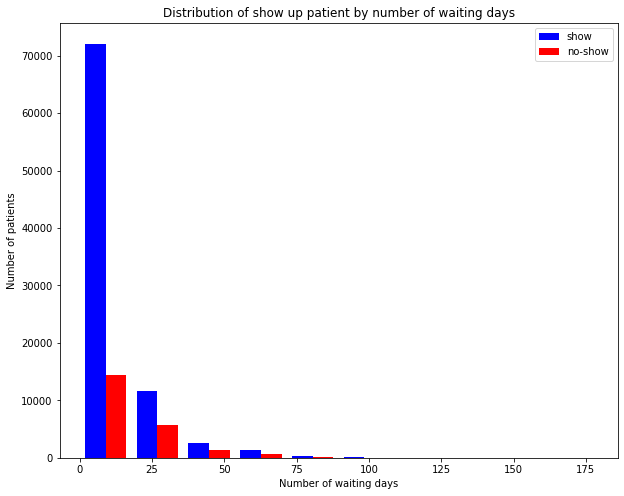

In [35]:
plt.figure(figsize=(10,8))
plt.hist([df_1[df_1['show_up']==1]['number_of_waiting_days'], df_1[df_1['show_up']==0]['number_of_waiting_days']], stacked=False, color = ['b','r'],label = ['show','no-show'])
plt.legend()
plt.title('Distribution of show up patient by number of waiting days')
plt.ylabel('Number of patients')
plt.xlabel('Number of waiting days')
plt.show();

From the histogram above, we can see that the distribution of over all show up result by `number of waiting days` for both show or no show is skewed to the right.



Next, I will use 5 different value of  `number_of_waiting_days` to calculate percentage of show up.

In [36]:
# list number of waiting days to be explored.
num_days_list = [2, 7,30, 60, 90, 120, 150]
print('-------------------------------------------------------------------', '\n')


for i in num_days_list :
    print('Number_of waiting days < {}'.format(i))
    print('---------------------------')
    total_1 = df_1.query('number_of_waiting_days< @i').sort_values(by=['number_of_waiting_days'])
    print('Total row count : {}'.format(total_1['show_up'].count()), '\n')
 
    noshowedup_1 = df_1.query('number_of_waiting_days < @i  & show_up == 1').sort_values(by=['number_of_waiting_days'])
    print('Show up = Yes')
    print('{} rows '.format(noshowedup_1['show_up'].count()))
    print('{} % '.format(noshowedup_1['show_up'].count()/total_1['show_up'].count()*100), '\n')
 
    showedup_1 = df_1.query('number_of_waiting_days < @i & show_up == 0 ').sort_values(by=['number_of_waiting_days'])
    print('Show up = No')
    print('{} rows '.format(showedup_1['show_up'].count()))
    print('{} % '.format(showedup_1['show_up'].count()/total_1['show_up'].count()*100), '\n')
    
    print('-------------------------------------------------------------------', '\n')



------------------------------------------------------------------- 

Number_of waiting days < 2
---------------------------
Total row count : 43773 

Show up = Yes
40868 rows 
93.36348890868801 %  

Show up = No
2905 rows 
6.636511091311996 %  

------------------------------------------------------------------- 

Number_of waiting days < 7
---------------------------
Total row count : 65836 

Show up = Yes
57583 rows 
87.46430524333192 %  

Show up = No
8253 rows 
12.535694756668084 %  

------------------------------------------------------------------- 

Number_of waiting days < 30
---------------------------
Total row count : 99433 

Show up = Yes
80733 rows 
81.19336638741666 %  

Show up = No
18700 rows 
18.806633612583347 %  

------------------------------------------------------------------- 

Number_of waiting days < 60
---------------------------
Total row count : 108346 

Show up = Yes
86662 rows 
79.98634005870083 %  

Show up = No
21684 rows 
20.01365994129917 %  

-----

The percentage of patients show up is higher if `number of waiting days` is lesser.

<a id='conclusions'></a>
## 4. Conclusions

> ### Question 1 : How `scholarship` relate to the `show-up` ? Patient that enrolled in this welfare program is more likely to show up ?
- 9.8% of the total patients have enrolled into the scholarship. 
- Out of 9.8%, 7.5% show up and 2.3% did not show up. 
- From the data, those who receive scholarship is more likely to show up.
- However, I cannot conclude that there is relationship between scholarship with show-up result.

> ### Question 2 : How does sms reminder relate to show up status for appointment ?
- Table shows percentage of SMS received VS show up
    
|  |Show up = Yes    | Show up = No    |   
|:--|:--|:--|
|SMS received  | 23.25%  | 8.85 %   |   
| No SMS received |56.57%   |   11.3%  |


> - From the data in table above, contrary to the usual belief, it appears that sending of SMS to the patient for their appointments isn’t making a big difference. 

> ### Question 3 : Which locations of hospital are having most appointment that did not show up ?

> - Hospital located at JARDIM CAMBURI has the highest number of patients not showing up, which is 1465 people.Followed by MARIA ORTIZ - 1219 people and ITARARÉ - 923. 

> - When I selected the data group by hospital-location and gender, we can see that female patients from hospital at JARDIM CAMBURI also give the highest count among the no show up result.

> - Hospital location did affect the show up result.  

> ### Question 4 :Will those below 12 years old and above 75 years old give a higher no show up result ?

> - A table showing the age group and its percentage of patient not show up in appointment.


|Group  |Age range| Show up = No |   
|:---:|:---:|:---:|
|Child  |(0 - 10)  |20.41%   |   
| Teen |(11-20)   |  25.71%   |
|  Young adult |(21-30)  | 24.65%   |
| Adult 1 |(31-40) | 21.39%|
|Adult 2 |(41-50)  | 19.6% |
|  Adult 3 |(51-60) |17.3 %|
|  Senior adult |(61-70)| 14.70%|
|  Old 1 |(71-80) | 15.28%|
|  Old 2 |(81-90) | 16.30%|
| Old 3  |(91-100) | 19.57%|

> - Data in table above shows that Age does not big impact on the show up.

> ### Question 5 : How does appointment time affect patients show up result ?

> All the appointment in this dataset only schedule appointment day without a time.  Thus, I cannot further explore on this question due to lacking of information.
    
    
>  ### Question 6 : Will Patient  more likely to show up if scheduled_day is nearer to appointment_day ?
> - A table showing the number of days and percentage of number of patients not show up.

| Number_of waiting days (x)      | Show up  = No  |
| :-------------: | :-----:|
|x < 2     | 6.65 % |
|x < 7     | 12.54 % |
|x < 30     | 18.81 % |
|x < 60     | 20.017 % |
|x < 90    | 20.179 % |
|x < 120    | 20.181 % |
|x < 150    | 20.184 % |

> - The percentage of patients show up is higher if `number of waiting days` is lesser.
> - Thus, patients are more likely to show up if scheduled_day is nearer to appointment_day.

>### Limitation :

> - I think we can better explore on hospital location with show up result if we have more characterics of the location eg: public transport access, in city or outskirt.

> - We do not have appointment time to be explored.

> - The data is only within 2 months, we can observe more pattern if we can have longer period of appointment day.


 